In [2]:
import pandas as pd 
DATASET = "amazon_reviews_us_Grocery_v1_00.tsv"
import logging
import warnings
import sys
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
logging.disable(sys.maxsize)



In [3]:
dataset = pd.read_table(DATASET, error_bad_lines=False, header=0, warn_bad_lines=False) 
# there are some malformed entries the dataset... let's ignore those for now


In [4]:
### Let's see what the dataset looks like... 
dataset.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5,0.0,0.0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31
1,US,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5,0.0,0.0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31
2,US,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5,0.0,0.0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31
3,US,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5,0.0,0.0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31
4,US,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5,0.0,0.0,N,Y,Five Stars,good,2015-08-31


In [5]:
#lots of nan values... :( 
dataset.isnull().sum()

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating          22
helpful_votes        23
total_votes          23
vine                 23
verified_purchase    23
review_headline      34
review_body          88
review_date          65
dtype: int64

In [21]:
# Lots of spammy duplicate reviews...might be worth checking if the same person is duplicating the reviews across multiple products

# Additions, because maybe same review_body is not duplicate i.e. "Good" as review.
x = dataset[dataset['review_body'].duplicated() == True]
x = x[dataset['customer_id'].duplicated() == True] # ADDED THIS
x = x[dataset['product_id'].duplicated() == True] # ADDED THIS
print(len(x))
x.head()

75122


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
2323,US,32433311,R3DPQJFH05T0HS,B00OZYNGUS,228095196,Viva Naturals - The FINEST Raw Organic Chia Se...,Grocery,5,0.0,0.0,N,Y,Great product.,I've been using this to help keep me from snac...,2015-08-31
2330,US,130585,R3IOACXWPYTRUP,B00HZ7HSTW,885171844,Beantown Roasters K Cups Variety Packs,Grocery,5,0.0,1.0,N,Y,The Office like it!,These were purchased for an office and they lo...,2015-08-31
2401,US,14100648,RA8F0DF5OJH3J,B000WV0RW8,653213046,Healthworks Chia Seeds 3lb 6lb Parent,Grocery,5,0.0,0.0,N,Y,GREAT! Thanks So much and God bless,GREAT! Thanks So much and God bless! &#60;&#...,2015-08-31
2436,US,43554935,RK0TC9FRNUL55,B00HQ3ZPJA,220133938,Chia Seeds,Grocery,5,0.0,0.0,N,Y,Five Stars,As advertised.,2015-08-31
2541,US,168472,R2WFNGP0E0ZLXW,B006ZMYLKC,322601427,Keurig,Grocery,5,0.0,0.0,N,Y,Five Stars,Satisfied,2015-08-31


In [22]:
#remove NaNs from the dataset  for now...
dataset = dataset.dropna()

In [23]:
def filter_heuristic(row):
    '''
    determine if a row is a negative review based on its score. Potentially extend it to include sentiment analysis 
    and presence of specific negative words 
    '''
    return row["star_rating"].astype(int) <=3

In [24]:
negative_rows = dataset.loc[filter_heuristic]
negative_rows.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
5,US,23649464,RIG9AWFOGRDVO,B00AL6QBZ6,681475449,Herr's Popcorn Hot Cheese 1 Oz (Pack of 30),Grocery,2,1.0,1.0,N,Y,Not Happy,The popcorn was stale.,2015-08-31
9,US,19624355,R1ODXB3C9UP3NL,B00J074W94,2499702,"Orgain Organic Plant Based Protein Powder, Pac...",Grocery,1,1.0,3.0,N,N,Disgusting now and difficult on digestion,Used to be a decent product. Disgusting now a...,2015-08-31
17,US,22765168,R3T6TTD2IN0EFZ,B00XDXMLL2,971154239,"Skippy Creamy Peanut Butter, with Salted Caram...",Grocery,1,4.0,4.0,N,N,"1 Out Of 5 Of My Co-Workers Thought It Was ""Okay""",I bought this from a local super market on a w...,2015-08-31
23,US,35636887,R9MISLBRG08FX,B00DBSFXUA,294404974,"Keebler Town House Pita Crackers, 9.5 Ounce",Grocery,1,0.0,0.0,N,Y,pita crackers,not craze about these. nothing really wrong wi...,2015-08-31
26,US,12650237,R2A9O8CWZ1PP74,B0083GJKR2,868929824,"Eclipse Sugar Free Gum, Spearmint, 120 Piece B...",Grocery,3,0.0,0.0,N,Y,Three Stars,it's gum..,2015-08-31


In [28]:
sorted_negative_rows = negative_rows.sort_values("product_id")
sorted_negative_rows.head() # ADDITION JUST TO CHECK

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
1975011,US,14434517,R25ATZCV5FBJMV,0805470867,518591127,Communion Bread Pack of 500,Grocery,2,3.0,4.0,N,Y,The only thing my church has ever complained a...,I'm the pastor of a church plant and the only ...,2012-10-16
1365978,US,47145,RUI9CRY6RZNRB,0805470867,518591127,Communion Bread Pack of 500,Grocery,1.0,0.0,0.0,N,Y,I HATE IT,what is that thing<br />it doesn't crunch like...,2014-02-21
1961839,US,37403535,R37YYRMOE7K2TB,0805470867,518591127,Communion Bread Pack of 500,Grocery,1,1.0,1.0,N,Y,Communion bread,"I purchased 3 boxes, two of them the experatio...",2012-11-11
78777,US,41394716,R2QAW3WQRYVQF5,0805470867,518591127,Communion Bread Pack of 500,Grocery,3,0.0,0.0,N,Y,Not what expected,"This came in a flimsy cardboard box, squished....",2015-08-04
1845770,US,11312642,R3M9ORU1I9L2C3,0805470867,518591127,Communion Bread Pack of 500,Grocery,2,0.0,0.0,N,Y,Gross,These things taste nothing like the communion ...,2013-02-18


In [29]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 5000, height = 5000, random_state=1, background_color='salmon', colormap='Pastel1',
                          collocations=False, stopwords = STOPWORDS).generate(text)
    plt.imshow(wordcloud)

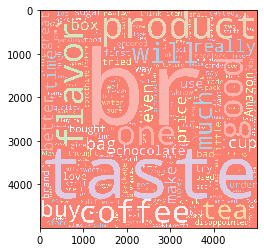

In [30]:
# generate a naive word cloud without any preprocessing....
generate_wordcloud(" ".join(sorted_negative_rows["review_body"]))